# Part II - GoBike Presentation
## by Erik Roulson

## Investigation Overview

The goal of this presentation is to show who is using the Ford Go-Bike system and what are they using it for.

I have found that the Go-Bikes are used mainly by men in their twenties and thirties. Most journey's are short, under fifteen minutes, and done by subscribers (that is to say people who use the bikes repeatedly and likely live locally). This suggests that they are being used to commute to and from work as opposed to cycling for leisure/exercise.

Non subscribers (presumably tourists or one time users) tend to travel for longer and at a more leisurely pace, suggesting that they are being used to explore the city rather than getting quickly from A to B.


## Dataset Overview and Executive Summary


The dataset used for this analysis was collected in 2019 and contains information on over 170'000 journeys made on the Ford Go-Bikes in the greater San Francisco area. My observations are as follows:
- Most users are male
- Most users are between 20 and 35 years old
- The average journey is under 15 minutes
- The average journey is under 2 km
- Most users are subscribers
- Subscribers use the bikes for shorter journeys than customers (non-subscribers)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('go_bike_clean.csv')

## (Visualization 1)

This pair of pie charts show the ratios for the catagorical data in question, the user type and gender for each jounrney. We see here that over 90% are subscribers and that almost 75% of all users are male.

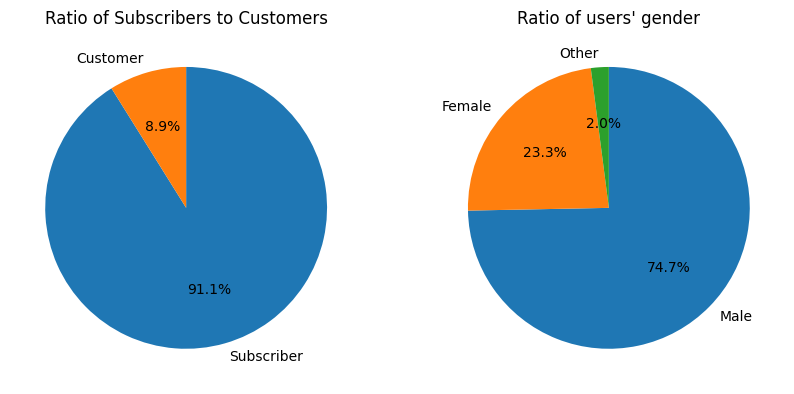

In [7]:
plt.figure(figsize = [10, 10]) 

plt.subplot(1, 2, 1) 
user_type = df.user_type.value_counts()
plt.pie(user_type, labels = user_type.index, startangle = 90, counterclock = False, autopct='%.1f%%');
plt.title('Ratio of Subscribers to Customers');

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
gender = df.member_gender.value_counts()
plt.pie(gender, labels = gender.index, startangle = 90, counterclock = False, autopct='%.1f%%');
plt.title("Ratio of users' gender");

## (Visualization 2)

These four histograms show the distribution for each of the continuous data types in question, distance, duration, speed, and age. From these we see that: the most common journey length is under 2km; the average time taken for the journey is under 15 minutes; the average speed is 11kph and; most users are under 40 years old.

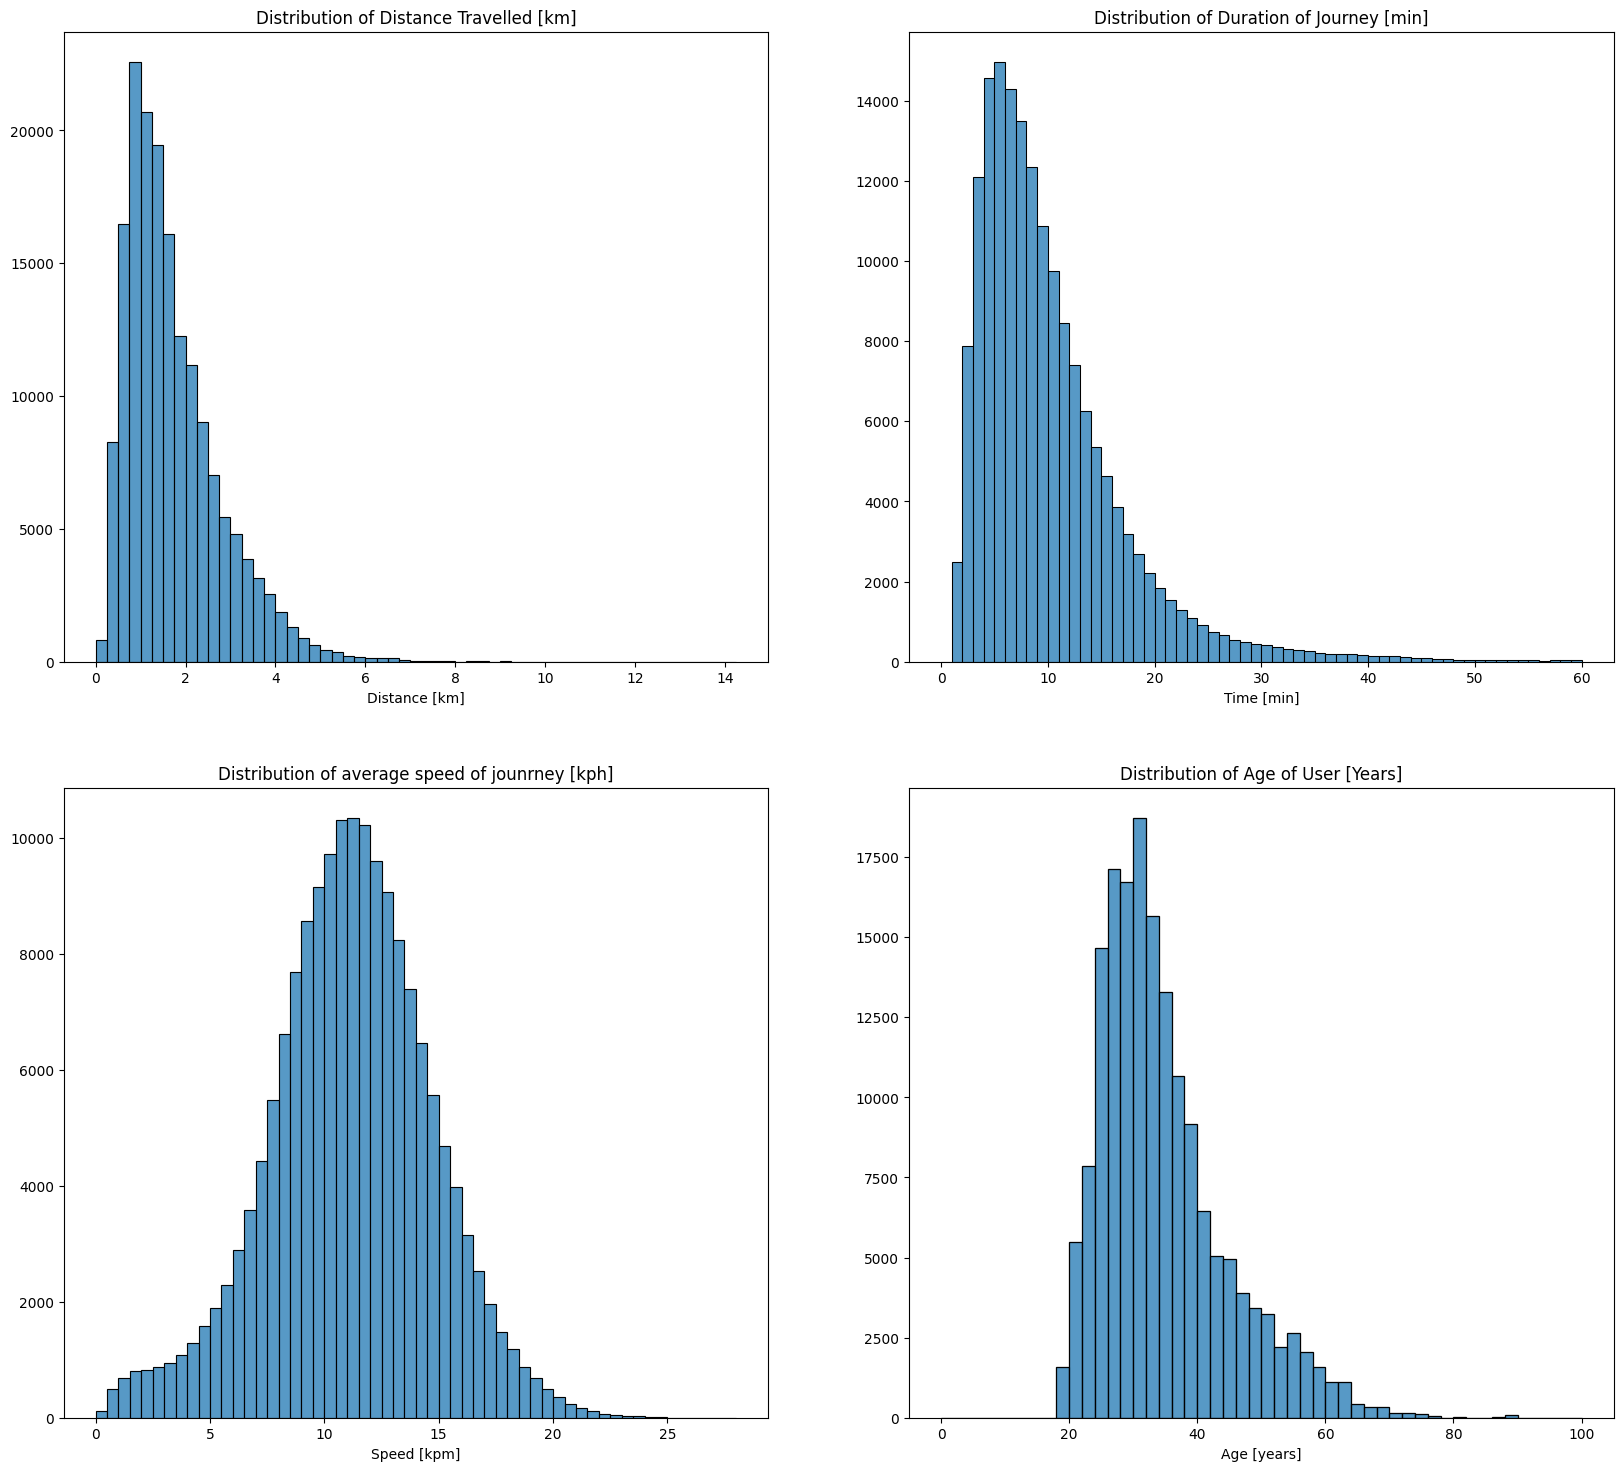

In [4]:
plt.figure(figsize = [20, 18])

plt.subplot(2, 2, 1)
bins = np.arange(0, df['distance'].max()+0.25, 0.25)
sns.histplot(data=df, x='distance', bins=bins);
plt.title("Distribution of Distance Travelled [km]");
plt.xlabel('Distance [km]');
plt.ylabel('');

plt.subplot(2, 2, 2)
bins = np.arange(0, df['duration_min'].max()+1, 1)
sns.histplot(data=df, x='duration_min', bins=bins);
plt.title("Distribution of Duration of Journey [min]");
plt.xlabel('Time [min]');
plt.ylabel('');

plt.subplot(2, 2, 3)
bins = np.arange(0, df['speed'].max()+0.5, 0.5)
sns.histplot(data=df, x='speed', bins=bins);
plt.title("Distribution of average speed of jounrney [kph]");
plt.xlabel('Speed [kpm]');
plt.ylabel('');

plt.subplot(2, 2, 4)
bins = np.arange(0, df['age'].max()+2, 2)
sns.histplot(data=df, x='age', bins=bins);
plt.title("Distribution of Age of User [Years]");
plt.xlabel('Age [years]');
plt.ylabel('');

## (Visualization 3)

These violin plots show us the difference in use between the subscribers and customers. With the subscribers tending to take shorter fast journeys than the customers.

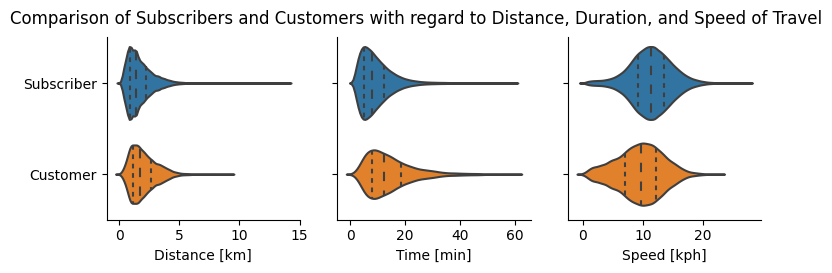

In [5]:
df1 = df.copy()
df1 = df1.rename(columns={'distance': 'Distance [km]', 'duration_min': 'Time [min]', 'speed':'Speed [kph]'})

g = sns.PairGrid(data=df1, x_vars=['Distance [km]', 'Time [min]', 'Speed [kph]'], y_vars=['user_type']);
g.map(sns.violinplot, inner='quartile');
g.set(ylabel = '')
g.fig.suptitle('Comparison of Subscribers and Customers with regard to Distance, Duration, and Speed of Travel', y = 1.05);